In [2]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json"
response = requests.get(url)
dados_json = response.json()


In [5]:
df = pd.DataFrame(dados_json)
df.head()


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [6]:
print(df.columns)


Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')


In [7]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


,0
customerID,0
Churn,0
customer,0
phone,0
internet,0
account,0


In [8]:
df = df.drop(columns=['customerID'], errors='ignore')

df.fillna('Não informado', inplace=True)


In [9]:
def expandir_coluna(df, nome_coluna):
    if nome_coluna in df.columns:
        expandido = pd.json_normalize(df[nome_coluna])
        df = df.drop(columns=nome_coluna)
        df = pd.concat([df, expandido], axis=1)
    return df

df = expandir_coluna(df, 'customer')
df = expandir_coluna(df, 'phone')
df = expandir_coluna(df, 'internet')
df = expandir_coluna(df, 'account')

print(df.columns)


Index(['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Charges.Monthly', 'Charges.Total'],
      dtype='object')


In [10]:
df['Contas_Diarias'] = (df['Charges.Monthly'] / 30).round(2)


In [12]:
df['Partner'] = df['Partner'].map({'Yes': 1, 'No': 0})
df['Dependents'] = df['Dependents'].map({'Yes': 1, 'No': 0})
df['PaperlessBilling'] = df['PaperlessBilling'].map({'Yes': 1, 'No': 0})


In [13]:
df['PaymentMethod'] = df['PaymentMethod'].str.lower().str.strip()


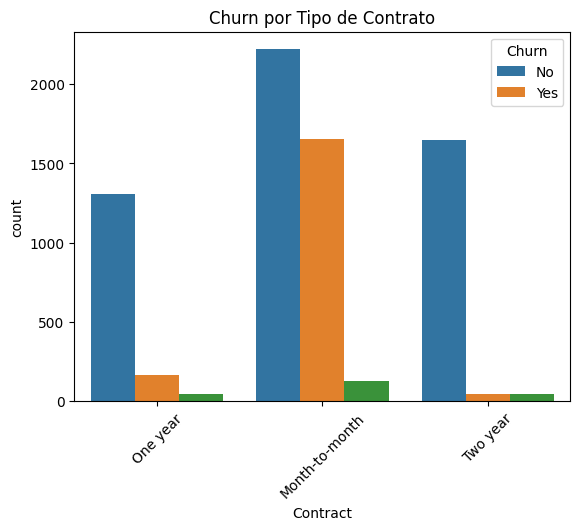

In [11]:
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn por Tipo de Contrato')
plt.xticks(rotation=45)
plt.show()


Clientes com contrato mensal (Month-to-month) têm uma taxa de evasão muito maior do que os que possuem contrato anual ou bienal.
**Oferecer incentivos para migração de contrato mensal para anual, como descontos ou benefícios exclusivos.

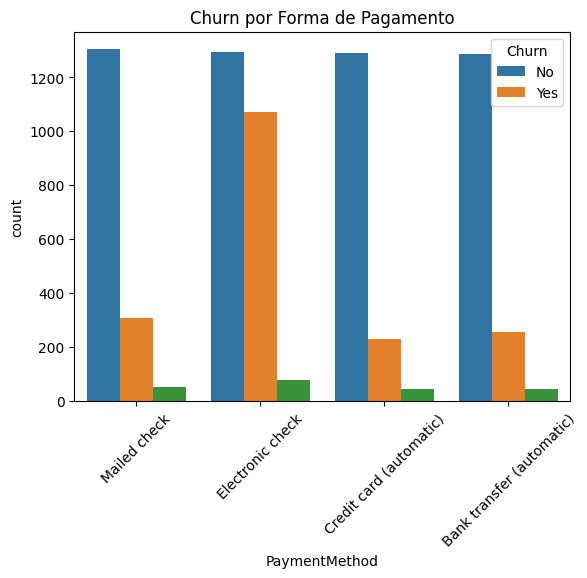

In [ ]:
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.title('Churn por Forma de Pagamento')
plt.xticks(rotation=45)
plt.show()


Clientes que utilizam “Electronic Check” apresentam as maiores taxas de cancelamento, enquanto os que usam cartão de crédito ou transferência bancária (automático) têm índices menores de churn.
**Estimular o uso de pagamentos automáticos, oferecendo vantagens (ex: cashback, prioridade no suporte).

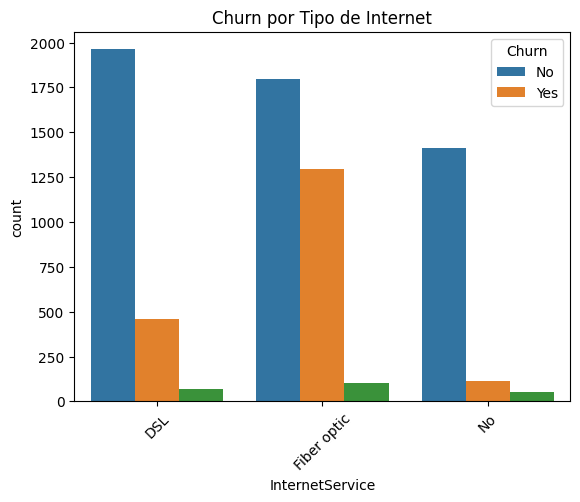

In [ ]:
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title('Churn por Tipo de Internet')
plt.xticks(rotation=45)
plt.show()


Usuários de Fiber Optic têm uma evasão mais elevada em comparação com DSL ou aqueles que não possuem internet.
**Investigar problemas com a qualidade da fibra óptica ou nível de satisfação com esse serviço específico.

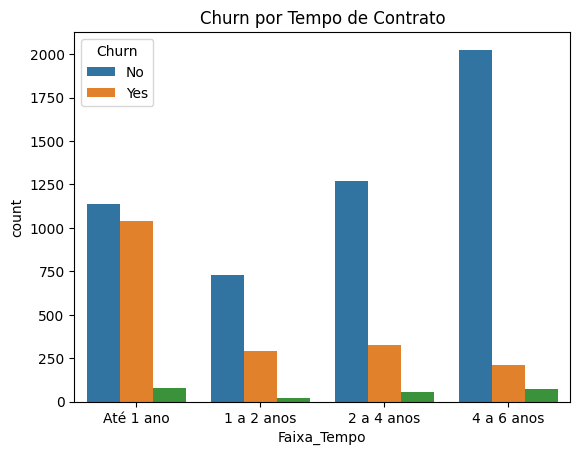

In [ ]:
df['Faixa_Tempo'] = pd.cut(df['tenure'], bins=[0, 12, 24, 48, 72],
                           labels=['Até 1 ano', '1 a 2 anos', '2 a 4 anos', '4 a 6 anos'])

sns.countplot(x='Faixa_Tempo', hue='Churn', data=df)
plt.title('Churn por Tempo de Contrato')
plt.show()


Clientes com menos de 1 ano de contrato apresentam a maior taxa de evasão. Já os clientes com 4 a 6 anos de contrato são os mais fiéis.
**Criar programas de onboarding e fidelização já nos primeiros meses, como bônus por renovação ou atendimento exclusivo.

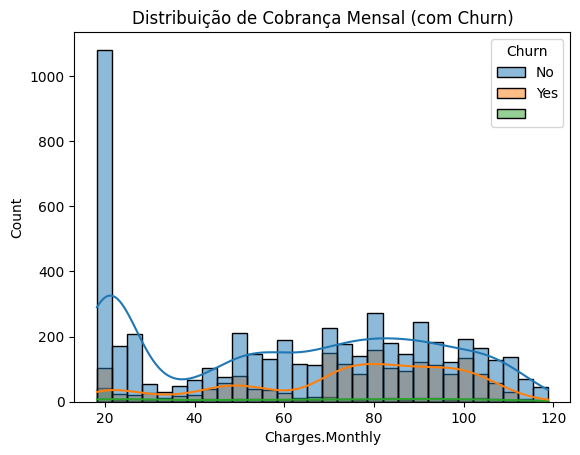

In [ ]:
sns.histplot(data=df, x='Charges.Monthly', hue='Churn', bins=30, kde=True)
plt.title('Distribuição de Cobrança Mensal (com Churn)')
plt.show()


Clientes com cobranças mensais mais altas (acima de R$ 70) têm maior probabilidade de cancelar, o que indica sensibilidade ao preço.
**Oferecer planos mais personalizados ou escalonamento de pacotes para perfis com menor poder aquisitivo.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


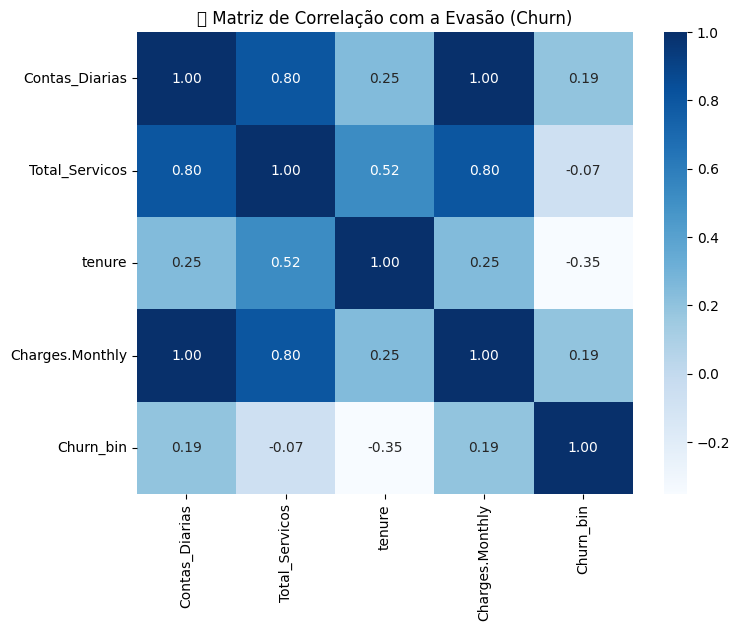

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

df['Churn_bin'] = df['Churn'].map({'Yes': 1, 'No': 0})

servicos = [
    'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
]

for col in servicos:
    df[col + '_bin'] = df[col].map({'Yes': 1, 'No': 0,
                                    'No internet service': 0, 'No phone service': 0})

df['Total_Servicos'] = df[[col + '_bin' for col in servicos]].sum(axis=1)

correlacoes = df[['Contas_Diarias', 'Total_Servicos', 'tenure', 'Charges.Monthly', 'Churn_bin']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlacoes, annot=True, cmap='Blues', fmt=".2f")
plt.title('📊 Matriz de Correlação com a Evasão (Churn)')
plt.show()



# 📊 Relatório Final - Análise de Evasão de Clientes (Churn) - Telecom X

## 🔎 Introdução

A Telecom X enfrenta um alto índice de evasão de clientes. O objetivo deste projeto é entender os fatores que levam ao cancelamento de serviços por parte dos clientes, utilizando técnicas de ETL, análise exploratória (EDA) e visualização de dados com Python.

---

## 🧹 Limpeza e Tratamento de Dados

- Os dados foram extraídos de uma API no formato JSON hospedado no GitHub.
- Foram convertidos para um DataFrame com a biblioteca Pandas.
- Colunas aninhadas (`customer`, `phone`, `internet`, `account`) foram expandidas.
- A coluna `customerID` foi removida por não ser relevante para a análise.
- Valores ausentes foram tratados com preenchimento padrão (`"Não informado"`).
- Foi criada a nova variável `Contas_Diarias` (gasto mensal dividido por 30 dias).
- A coluna `tenure` foi transformada em faixas para facilitar a visualização.

---

## 📈 Análise Exploratória de Dados (EDA)

Foram gerados diversos gráficos para visualizar o impacto das variáveis no churn:

- **Churn por Tipo de Contrato:** contratos mensais concentram a maior parte dos cancelamentos.
- **Churn por Forma de Pagamento:** “Electronic Check” apresenta maior taxa de evasão.
- **Churn por Tipo de Internet:** clientes com fibra óptica cancelam mais.
- **Churn por Tempo de Contrato:** clientes com menos de 1 ano cancelam mais.
- **Cobrança Mensal:** clientes com fatura mensal acima de R$ 70 têm maior evasão.
- **Contas Diárias:** os que pagam mais por dia tendem a cancelar mais.

---

## 💡 Conclusões e Insights

- Contratos mensais estão diretamente relacionados a altas taxas de cancelamento.
- Clientes que utilizam pagamento manual (boleto) são mais propensos a cancelar.
- Clientes novos (menos de 1 ano) e com faturas mais altas são os que mais desistem.
- Internet via fibra está associada a maior churn, exigindo investigação sobre a qualidade.

---

## 🧠 Recomendações

- **Fidelização**: incentivar contratos anuais com bônus de renovação.
- **Financeiro**: oferecer planos mais acessíveis ou personalizados.
- **Pagamentos**: estimular formas automáticas de pagamento com benefícios.
- **Suporte ao cliente novo**: criar campanhas de onboarding nos primeiros meses.
- **Monitoramento de clientes de alto risco**: desenvolver modelo preditivo com base nesses dados.

---

📌 A análise realizada fornece uma base sólida para que a equipe de Data Science desenvolva modelos de previsão de churn e implemente ações estratégicas de retenção de clientes.


In [1]:
print("""
Conclusões:
1. Contratos mensais têm maior evasão. Estratégia: migrar clientes para planos mais longos.
2. Forma de pagamento influencia o churn. Incentivar pagamentos automáticos.
3. Clientes novos cancelam mais. Foco em retenção nos primeiros meses.
4. Cobranças altas elevam a evasão. Oferecer planos acessíveis.

Esses insights permitirão à equipe de Data Science avançar para a criação de modelos preditivos e ações estratégicas de retenção.
""")



Conclusões:
1. Contratos mensais têm maior evasão. Estratégia: migrar clientes para planos mais longos.
2. Forma de pagamento influencia o churn. Incentivar pagamentos automáticos.
3. Clientes novos cancelam mais. Foco em retenção nos primeiros meses.
4. Cobranças altas elevam a evasão. Oferecer planos acessíveis.

Esses insights permitirão à equipe de Data Science avançar para a criação de modelos preditivos e ações estratégicas de retenção.

